# Neural Network with Keras

We have made a lot of effort to program our neural network that is able to classify differenr handwritten number with the help of numpy. A lot of other people did that already and since this is the basis for many applications nowadays, a large number of API (application programming interfaces) exist. Python plays therby a leading role. 
We will use in the follwing the interface provided by the `keras` module. `keras` is actually sitting on top of the real machine learning API, which is in our case `tensorflow`. `keras` makes the use of tensorflow a bit more friendly and from the example below, you wil recognize by how much shorter our code gets with the keras and tensorflow API.

In [23]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical,plot_model

from keras import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams.update({'font.size': 18,
                     'axes.titlesize': 20,
                     'axes.labelsize': 20,
                     'axes.labelpad': 1,
                     'lines.linewidth': 2,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 18,
                     'ytick.labelsize' : 18,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in'
                    })

## MNIST Data Set (Keras)

This loads the same data as in our previous notebook, except that the function to do that is directly provided by `keras`.

In [38]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((60000, 28*28))
x_train = x_train.astype('float32')/255

x_test = x_test.reshape((10000, 28*28))
x_test = x_test.astype('float32')/255

# one-hot encoding
y_train = to_categorical(y_train) 
y_test = to_categorical(y_test) 

## Build the model

The next few lines create the whole neural network with an input layer, a hidden layer with 64 neurons and and output layer with 10 neurons.

In [47]:
model = Sequential([
    Dense(64, activation='sigmoid', input_shape=(28 * 28, )),
    Dense(10, activation='softmax')
])

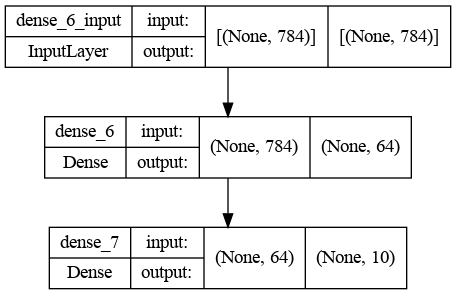

In [48]:
plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)

## Compile the model

The `compile` method assembles everything to create a model for training. You can specify here the stochastic gradient descent method in the same way as the loss function.

In [49]:
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

Finally, the `fit` method allows us to train the model for a specified number of epochs.

In [51]:
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
 275/1875 [===>..........................] - ETA: 0s - loss: 0.3216 - accuracy: 0.9075

2023-07-11 13:53:05.833950: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 1s 567us/step - loss: 0.3172 - accuracy: 0.9098
Epoch 2/20
1875/1875 [==============================] - 1s 552us/step - loss: 0.3084 - accuracy: 0.9119
Epoch 3/20
1875/1875 [==============================] - 1s 549us/step - loss: 0.3006 - accuracy: 0.9144
Epoch 4/20
1875/1875 [==============================] - 1s 551us/step - loss: 0.2935 - accuracy: 0.9169
Epoch 5/20
1875/1875 [==============================] - 1s 555us/step - loss: 0.2870 - accuracy: 0.9188
Epoch 6/20
1875/1875 [==============================] - 1s 553us/step - loss: 0.2808 - accuracy: 0.9201
Epoch 7/20
1875/1875 [==============================] - 1s 551us/step - loss: 0.2753 - accuracy: 0.9218
Epoch 8/20
1875/1875 [==============================] - 1s 549us/step - loss: 0.2700 - accuracy: 0.9233
Epoch 9/20
1875/1875 [==============================] - 1s 550us/step - loss: 0.2649 - accuracy: 0.9247
Epoch 10/20
1875/1875 [==============================] - 1s 550us/step - lo

## Testing the model

We may now use our trained model to predict the number in the image with the `model.predict` function. This delivers an array of 10 numbers, which represent the confidences that the number $0,\ldots,9$ are contained. The index of the biggest number thus represents the number contained in the image.

In [54]:
model.predict(x_test[i,:].reshape(1,784))

array([[3.3470042e-05, 8.6805121e-06, 1.1352806e-04, 5.8598683e-04,
        1.9212976e-02, 8.8488462e-04, 1.8833722e-05, 1.4240003e-02,
        5.1060988e-04, 9.6439105e-01]], dtype=float32)

In [61]:
student=(x_test[12,:].reshape(28,28)+x_test[42,:].reshape(28,28)+x_test[3,:].reshape(28,28))/3

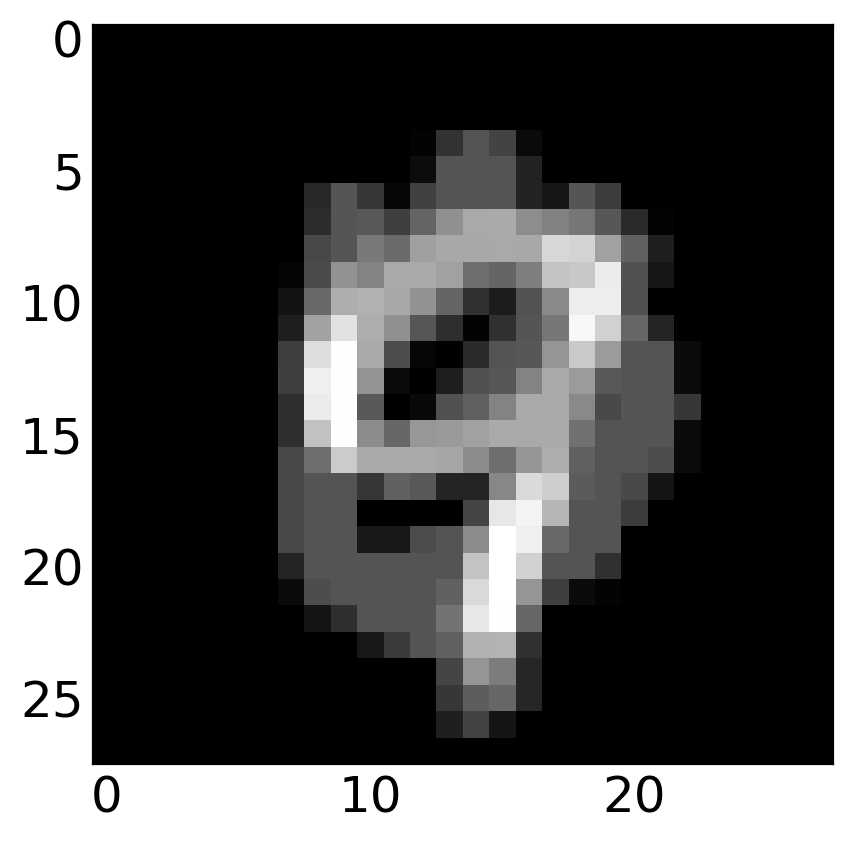

In [62]:
plt.imshow(student,cmap="gray")

prediction:  9


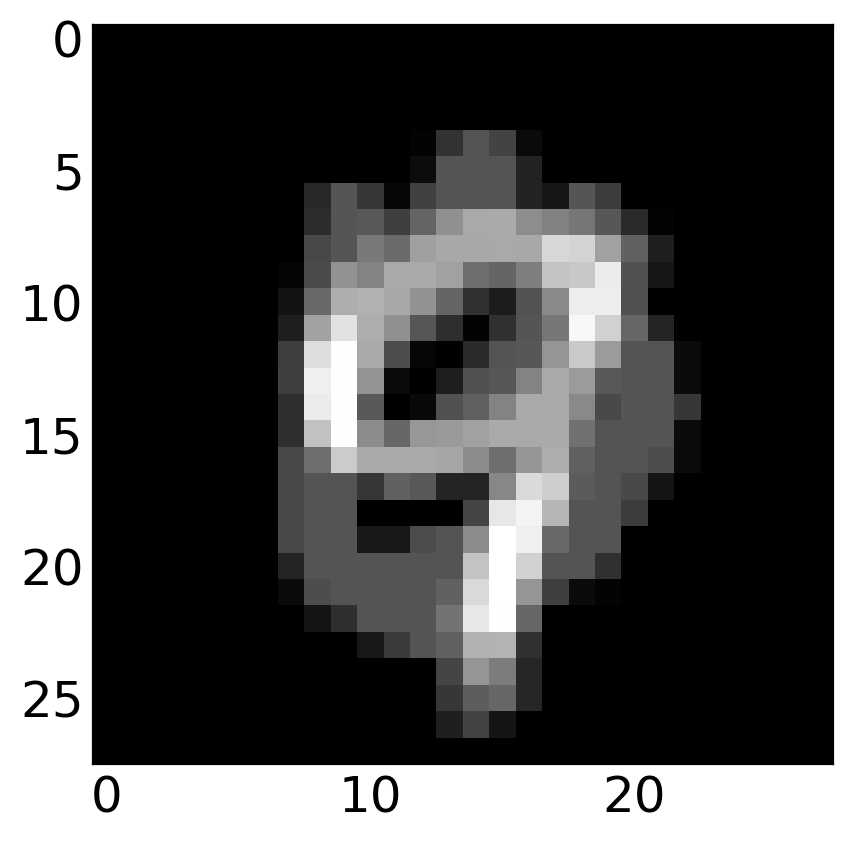

In [63]:
i=42
plt.imshow(student.reshape(28,28), cmap='gray')
print("prediction: ",np.argmax(model.predict(student.reshape(1,784))))

In [64]:
model.predict(student.reshape(1,784))

array([[1.77512094e-02, 9.22485924e-05, 8.42965860e-03, 8.65467917e-03,
        4.02621441e-02, 1.75370630e-02, 1.91166031e-03, 1.20765775e-01,
        6.74873590e-02, 7.17108250e-01]], dtype=float32)

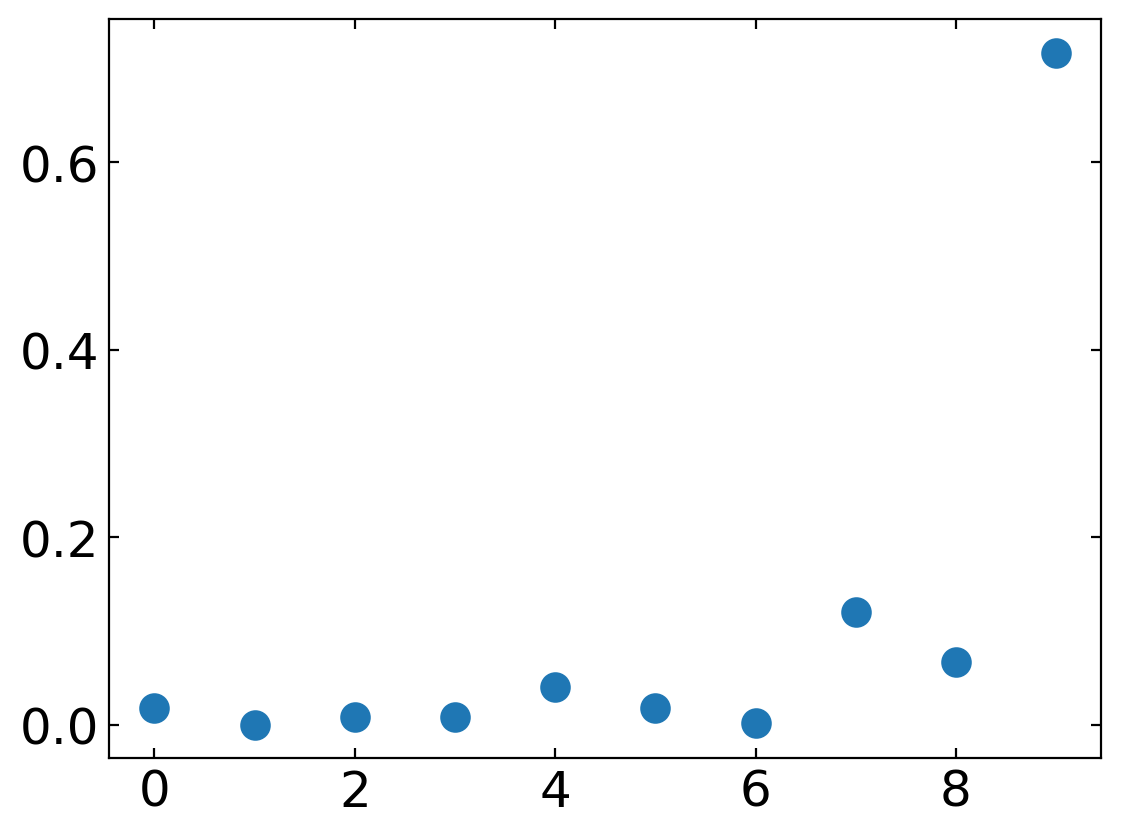

In [68]:
plt.scatter(range(0,10),model.predict(student.reshape(1,784)))